# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [48]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

clientes = pd.read_csv('clientes.csv')

In [34]:
clientes = pd.read_csv('clientes.csv')

variaveis_explicativas = clientes.select_dtypes(exclude='object')

X = variaveis_explicativas.drop('mau', axis=1)
y = clientes['mau']

#X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Dimensões do conjunto de treinamento:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print()
print("Dimensões do conjunto de validação:")
print("X_val:", X_val.shape)
print("y_val:", y_val.shape)

Dimensões do conjunto de treinamento:
X_train: (11655, 8)
y_train: (11655,)

Dimensões do conjunto de validação:
X_val: (4995, 8)
y_val: (4995,)


#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [35]:
#2.1)
clf = DecisionTreeClassifier()

In [36]:
#2.2)
clf.fit(X_train, y_train)

DecisionTreeClassifier()

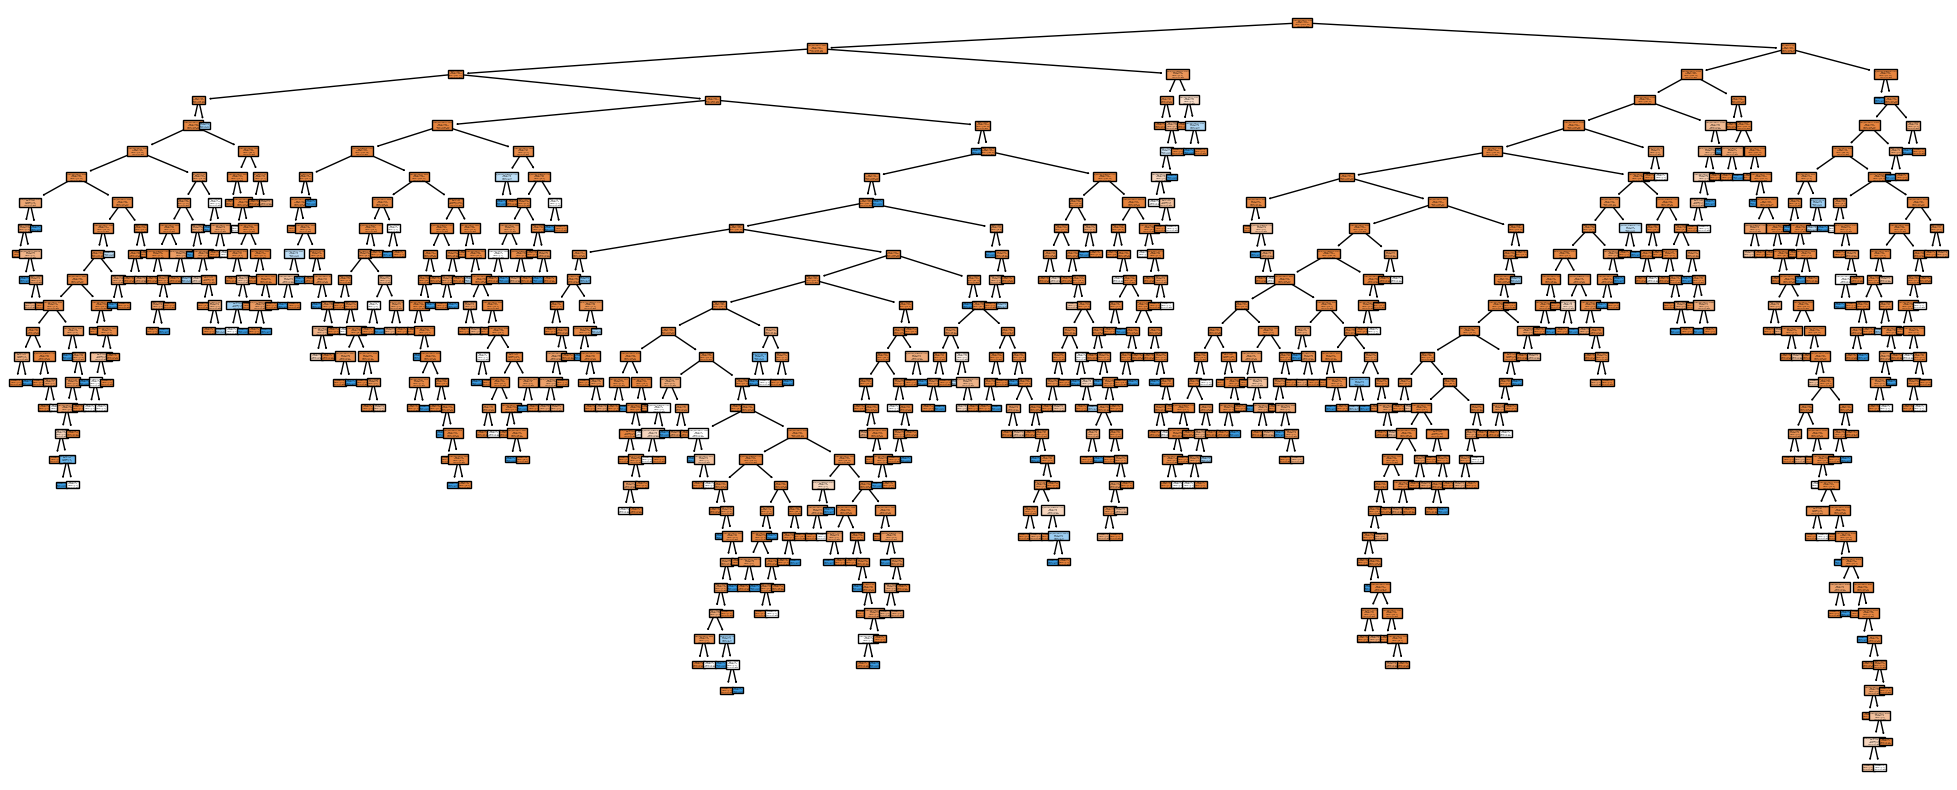

In [37]:
#2.3)
plt.figure(figsize=(25, 10))
plot_tree(clf, feature_names=X_train.columns, class_names=['Não Mau', 'Mau'], filled=True)
plt.show()

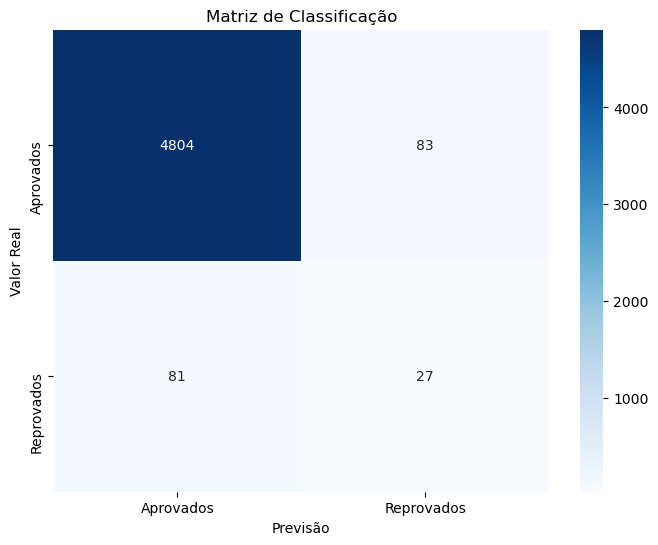

In [38]:
#2.4)
y_pred = clf.predict(X_val)

labels = ['Aprovados', 'Reprovados']

cm = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

plt.title('Matriz de Classificação')
plt.xlabel('Previsão')
plt.ylabel('Valor Real')

plt.show()

In [40]:
#2.5)
from sklearn.metrics import accuracy_score

y_train_pred = clf.predict(X_train)

train_accuracy = accuracy_score(y_train, y_train_pred)

print("Acurácia na base de treinamento:", train_accuracy)

Acurácia na base de treinamento: 0.99004719004719


#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [42]:
#3.1)
y_pred_test = clf.predict(X_test)

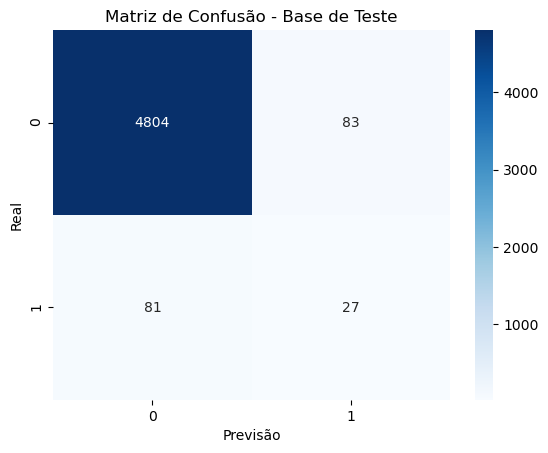

In [50]:
#3.2)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Previsão")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Base de Teste")
plt.show()

In [53]:
#3.3)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Acurácia - Base de Treinamento:", train_accuracy)
print("Acurácia - Base de Teste:", test_accuracy)

Acurácia - Base de Treinamento: 0.99004719004719
Acurácia - Base de Teste: 0.9671671671671672


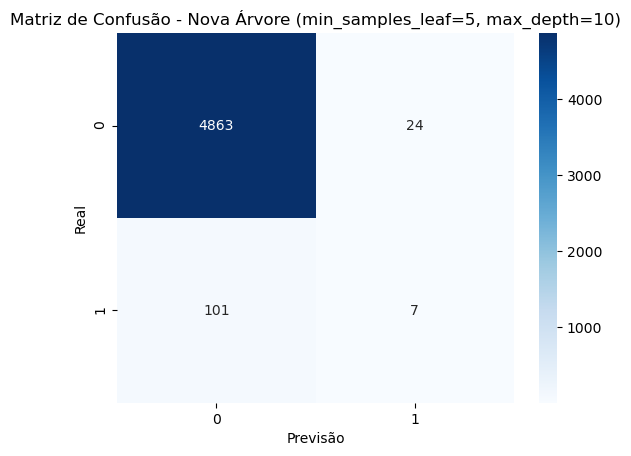

In [59]:
#3.4) Parte 1
clf_new = DecisionTreeClassifier(min_samples_leaf=5, max_depth=10, random_state=123)

clf_new.fit(X_train, y_train)

y_pred_test_new = clf_new.predict(X_test)

cm_new = confusion_matrix(y_test, y_pred_test_new)
sns.heatmap(cm_new, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Previsão")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Nova Árvore (min_samples_leaf=5, max_depth=10)")
plt.show()

In [58]:
#3.4) Parte 2
prop_maus = sum(y_pred_test_new == 1) / len(y_pred_test_new)
print("Proporção de proponentes classificados como 'maus':", prop_maus)

Proporção de proponentes classificados como 'maus': 0.006206206206206206


In [60]:
#3.5)
y_bons = np.zeros_like(y_test)
accuracy_bons = accuracy_score(y_test, y_bons)

print("Acurácia se todos os contratos fossem classificados como 'bons':", accuracy_bons)

Acurácia se todos os contratos fossem classificados como 'bons': 0.9783783783783784
